## Business Problem Description

To Classify the health of a fetus as Normal, Suspect or Pathological using CTG data.

Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
fetal_health_df = pd.read_csv('fetal_health.csv')

In [68]:
fetal_health_df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0  120.0           0.000          0.0             0.000                  
1  132.0           0.006          0.0             0.006                  
2  133.0           0.003          0.0             0.008                  
3  134.0           0.003          0.0             0.008                  
4  132.0           0.007          0.0             0.008                  

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0  0.000                0.0                   0.0                        
1  0.003                0.0                   0.0                        
2  0.003                0.0                   0.0                        
3  0.003                0.0                   0.0                        
4  0.000                0.0                   0.0                        

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0  73.0                             0.5                                    
1  17.0                             2.1                                    
2  16.0                             2.1                                    
3  16.0                             2.4                                    
4  16.0                             2.4                                    

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0  43.0                                                    ...  62.0            
1  0.0                                                     ...  68.0            
2  0.0                                                     ...  68.0            
3  0.0                                                     ...  53.0            
4  0.0                                                     ...  53.0            

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0  126.0          2.0                        0.0                          
1  198.0          6.0                        1.0                          
2  198.0          5.0                        1.0                          
3  170.0          11.0                       0.0                          
4  170.0          9.0                        0.0                          

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0  120.0           137.0           121.0             73.0                 
1  141.0           136.0           140.0             12.0                 
2  141.0           135.0           138.0             13.0                 
3  137.0           134.0           137.0             13.0                 
4  137.0           136.0           138.0             11.0                 

   histogram_tendency  fetal_health  
0  1.0                 2.0           
1  0.0                 1.0           
2  0.0                 1.0           
3  1.0                 1.0           
4  1.0                 1.0           

[5 rows x 22 columns]

In [69]:
fetal_health_df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [70]:
# Analyse statically insight of data
fetal_health_df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count  2126.000000     2126.000000    2126.000000     2126.000000            
mean   133.303857      0.003178       0.009481        0.004366               
std    9.840844        0.003866       0.046666        0.002946               
min    106.000000      0.000000       0.000000        0.000000               
25%    126.000000      0.000000       0.000000        0.002000               
50%    133.000000      0.002000       0.000000        0.004000               
75%    140.000000      0.006000       0.003000        0.007000               
max    160.000000      0.019000       0.481000        0.015000               

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count  2126.000000          2126.000000           2126.000000                
mean   0.001889             0.000003              0.000159                   
std    0.002960             0.000057              0.000590                   
min    0.000000             0.000000              0.000000                   
25%    0.000000             0.000000              0.000000                   
50%    0.000000             0.000000              0.000000                   
75%    0.003000             0.000000              0.000000                   
max    0.015000             0.001000              0.005000                   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count  2126.000000                      2126.000000                            
mean   46.990122                        1.332785                               
std    17.192814                        0.883241                               
min    12.000000                        0.200000                               
25%    32.000000                        0.700000                               
50%    49.000000                        1.200000                               
75%    61.000000                        1.700000                               
max    87.000000                        7.000000                               

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count  2126.00000                                              ...   
mean   9.84666                                                 ...   
std    18.39688                                                ...   
min    0.00000                                                 ...   
25%    0.00000                                                 ...   
50%    0.00000                                                 ...   
75%    11.00000                                                ...   
max    91.00000                                                ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count  2126.000000    2126.000000    2126.000000                 
mean   93.579492      164.025400     4.068203                    
std    29.560212      17.944183      2.949386                    
min    50.000000      122.000000     0.000000                    
25%    67.000000      152.000000     2.000000                    
50%    93.000000      162.000000     3.000000                    
75%    120.000000     174.000000     6.000000                    
max    159.000000     238.000000     18.000000                   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count  2126.000000                 2126.000000     2126.000000      
mean   0.323612                    137.452023      134.610536       
std    0.706059                    16.381289       15.593596        
min    0.000000                    60.000000       73.000000        
25%    0.000000                    129.000000      125.000000       
50%    0.000000                    139.000000      136.000000       
75%    0.000000                    148.000000      145.000000       
max    10.000000                   187.000000      182.000000       

       histogram_median  histogr

**DataFrame.describe()** method generates descriptive statistics for only numeric values not for categorical values. This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Now, let's understand the statistics that are generated by the describe() method:

- Count tells us the number of NoN-empty rows in a feature. As we can see there are no NoN-empty rows.
- Mean tells us the mean value of that feature.
- Std tells us the Standard Deviation Value of that feature.
- Min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
- Max tells us the maximum value of that feature.


In [71]:
fetal_health_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**DataFrame.info()** method prints a concise summary of a DataFrame.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [72]:
print(f"The dataset size: {fetal_health_df.shape}")

The dataset size: (2126, 22)


Property **DataFrame.shape** returns a tuple representing the dimensionality of the DataFrame.

1.0    1655
2.0    295 
3.0    176 
Name: fetal_health, dtype: int64


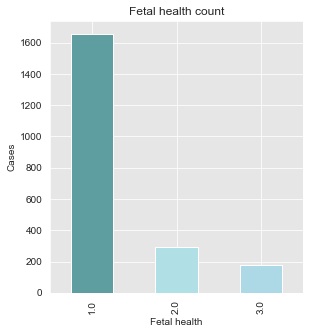

In [73]:
total = fetal_health_df["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(fetal_health_df["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
vis_fetal_health = fetal_health_df.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")

plt.show()

<AxesSubplot:ylabel='fetal_health'>

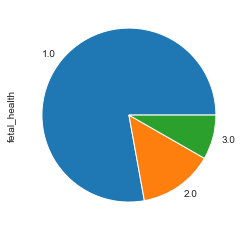

In [74]:
''' Visualising through Pie chart as well '''
fetal_health_df.fetal_health.value_counts().plot(kind='pie')

- The target feature looks imbalanced.. We need to fix this, before moving into this let us see the **feature importance** first.

In [75]:
X1 = fetal_health_df.iloc[:,:-1]
y1 = fetal_health_df.iloc[:,-1]

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_best_features = SelectKBest(score_func=f_classif,k=10)
best_features=fit_best_features.fit(X1,y1)

In [77]:
fetal_health_df_scores = pd.DataFrame(best_features.scores_)
fetal_health_df_cols = pd.DataFrame(X1.columns)

In [78]:
featurescores = pd.concat([fetal_health_df_cols,fetal_health_df_scores],axis=1)
featurescores.columns=['column','scores']
featurescores

column      scores
0   baseline value                                          140.621076
1   accelerations                                           196.027523
2   fetal_movement                                          11.679797 
3   uterine_contractions                                    93.715743 
4   light_decelerations                                     66.864754 
5   severe_decelerations                                    28.448156 
6   prolongued_decelerations                                505.853206
7   abnormal_short_term_variability                         343.820419
8   mean_value_of_short_term_variability                    119.882006
9   percentage_of_time_with_abnormal_long_term_variability  345.156385
10  mean_value_of_long_term_variability                     70.174093 
11  histogram_width                                         55.088241 
12  histogram_min                                           87.340503 
13  histogram_max                                           2.464923  
14  histogram_number_of_peaks                               12.104834 
15  histogram_number_of_zeroes                              2.196373  
16  histogram_mode                                          275.117696
17  histogram_mean                                          297.625497
18  histogram_median                                        248.772237
19  histogram_variance                                      150.796849
20  histogram_tendency                                      44.542294

In [79]:
print(featurescores.nlargest(13,'scores'))

                                                    column      scores
6   prolongued_decelerations                                505.853206
9   percentage_of_time_with_abnormal_long_term_variability  345.156385
7   abnormal_short_term_variability                         343.820419
17  histogram_mean                                          297.625497
16  histogram_mode                                          275.117696
18  histogram_median                                        248.772237
1   accelerations                                           196.027523
19  histogram_variance                                      150.796849
0   baseline value                                          140.621076
8   mean_value_of_short_term_variability                    119.882006
3   uterine_contractions                                    93.715743 
12  histogram_min                                           87.340503 
10  mean_value_of_long_term_variability                     70.174093 


**These are the top 13 important features.**

## Exploratory Data Analysis

**Count the missing and null values**

Here, it is easy to count the missing and null values. In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That is why we use some imputation techniques to replace the NaN values with some probable values.

In [80]:
# Count the missing and null values for dataset fetal health.
miss_values = fetal_health_df.columns[fetal_health_df.isnull().any()]
print(f"Missing values:\n{fetal_health_df[miss_values].isnull().sum()}")

null_values = fetal_health_df.columns[fetal_health_df.isna().any()]
print(f"Null values:\n{fetal_health_df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


As the result, In this case, there are neither null values nor missing values in the dataset.

**Visualize missing values (NaN) using Missingno Library:**

We use **Missingno library** which offers a very nice way to visualize the distribution of NaN values. Missingno is a Python library and compatible with Pandas.

**Bar Chart :**

This bar chart gives us an idea about how many missing values are there in each column.

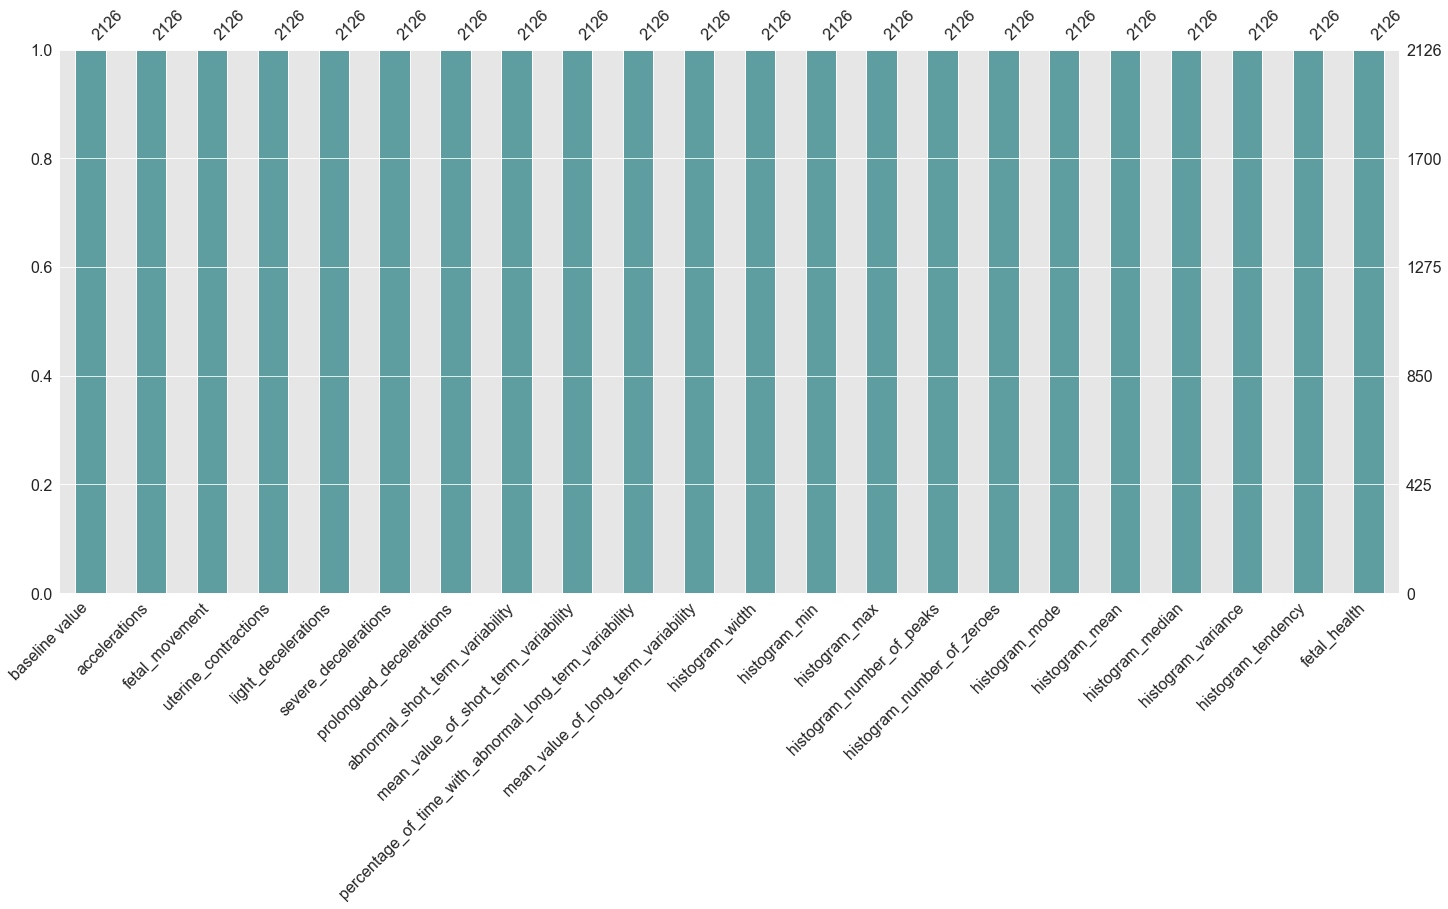

In [81]:
# Null count analysis
import missingno as msno
null_plot = msno.bar(fetal_health_df, color = "#5F9EA0")

**Hence, the dataset is clean, we would not need to clean it further.**

**Data visualizations of "fetal_health" column shows us the percentage of fetal health state.**

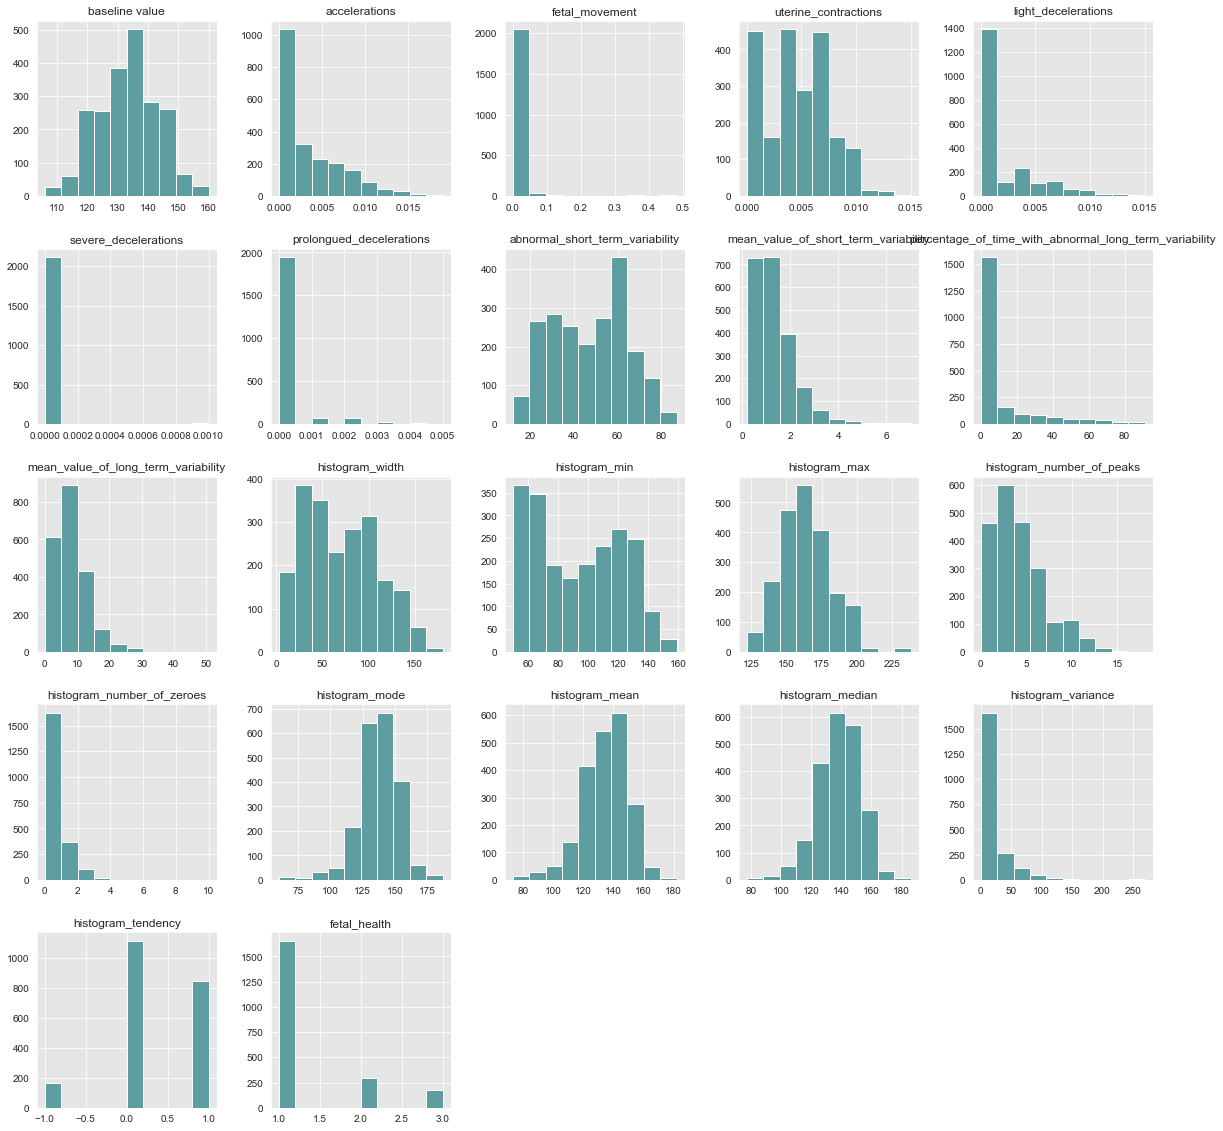

In [82]:
ata_hist_plot = fetal_health_df.hist(figsize = (20,20), color = "#5F9EA0")

**The important things we could learn about the above plot is Skewness. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. There are three types of skewed distributions. A right (or positive) skewed distribution, left (or negative) skewed distribution, and normal distribution.**

- A left-skewed distribution has a long-left tail. Left-skewed distributions are also called negatively skewed distributions. That is because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.
- A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That is because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.
- The skewness for a normal distribution is zero and looks a bell curve.

**Correlation Numeric features with output variable(fetal_health)**

Here, we want to show the correlation between numerical features and the target "fetal_health", in order to have a first idea of the connections between features. Just by looking at the heatmap below we can see some features have the dark colours, Those features have high correlation with the target.

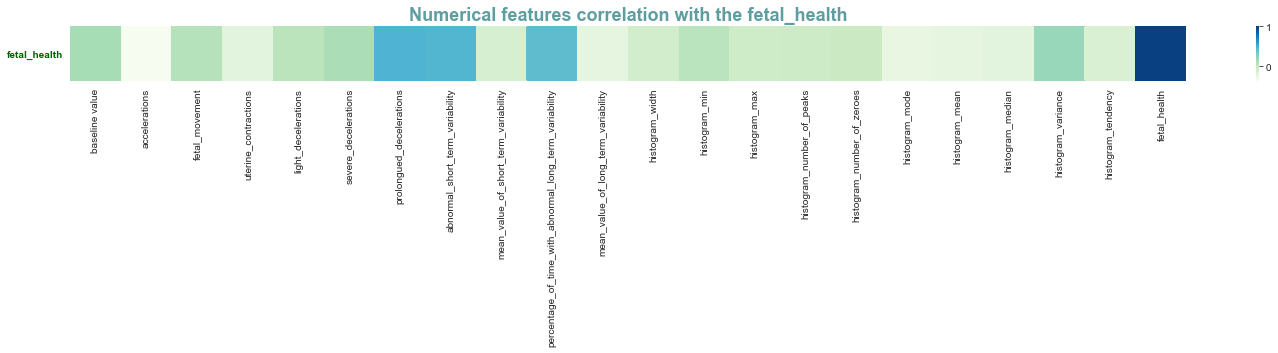

In [83]:
numeric_data = fetal_health_df.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [84]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

We can see three features: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target column (fetal_health).

**Scatter matrix**

A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.

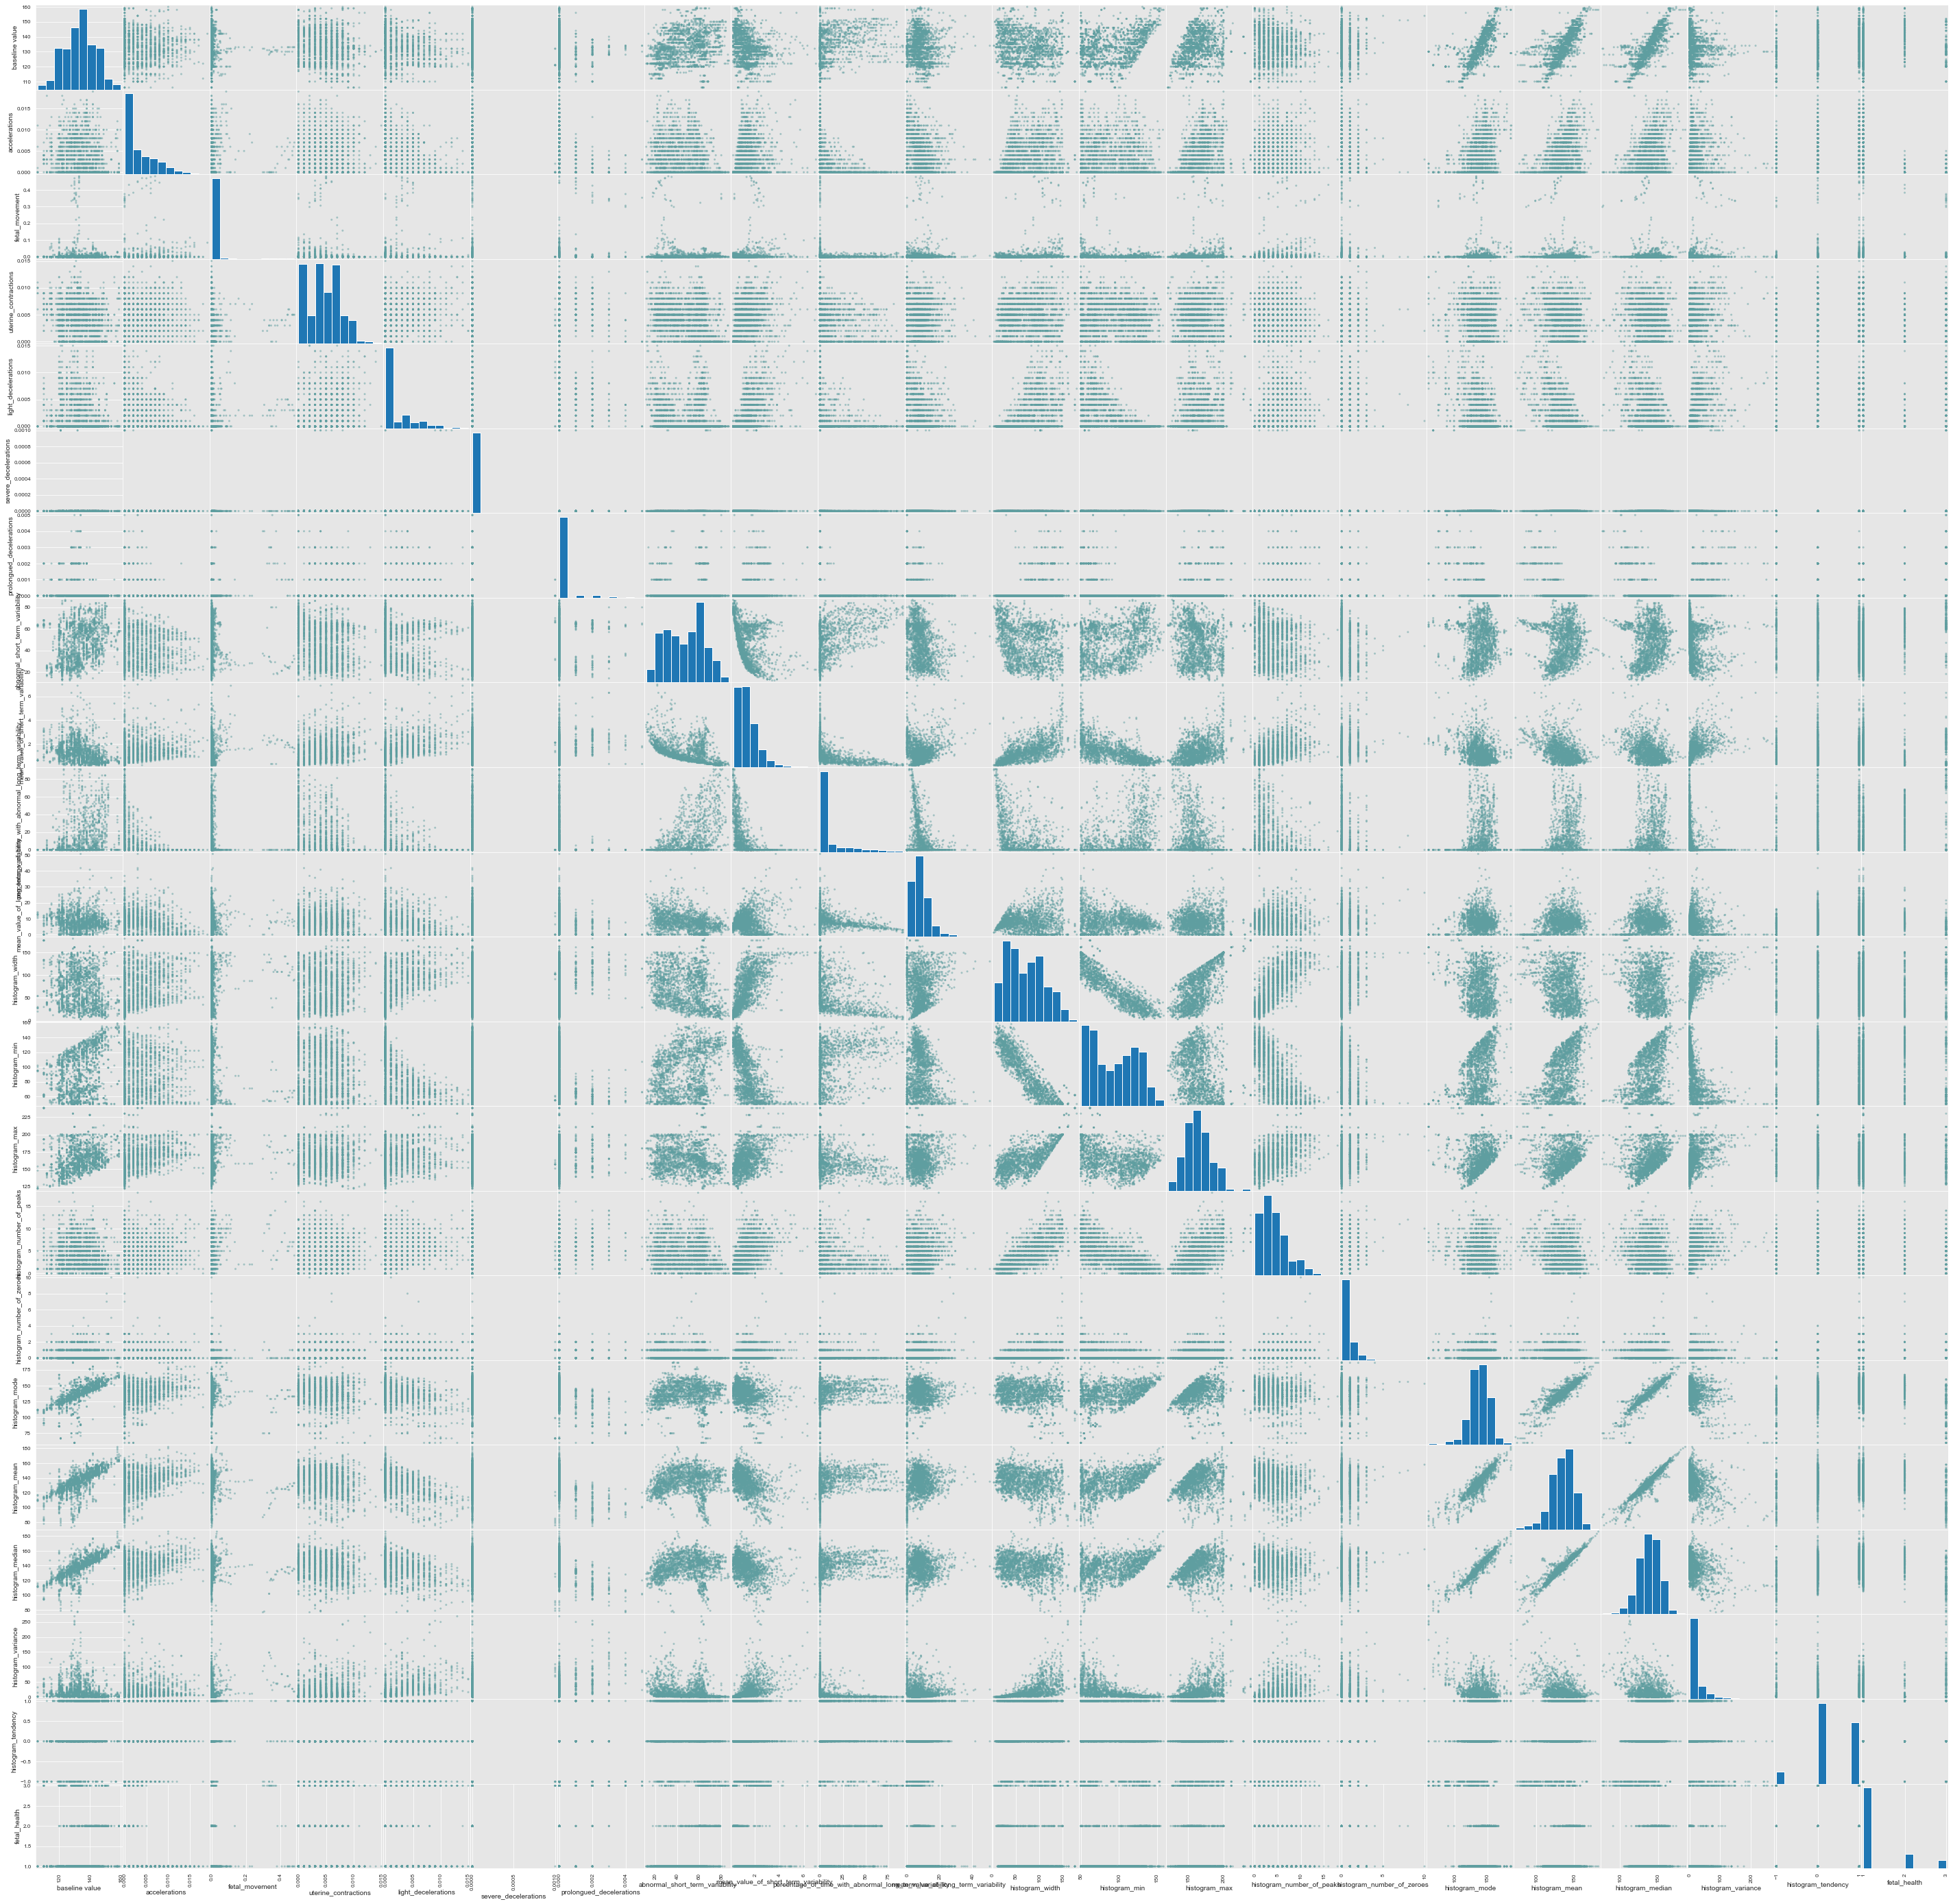

In [85]:
from pandas.plotting import scatter_matrix
scatterMatrix = scatter_matrix(fetal_health_df,figsize=(50, 50), color = "#5F9EA0")

**Heatmap**

A heat map is a two-dimensional representation of information with the help of colours. Heat maps can help the user visualize simple or complex information. Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

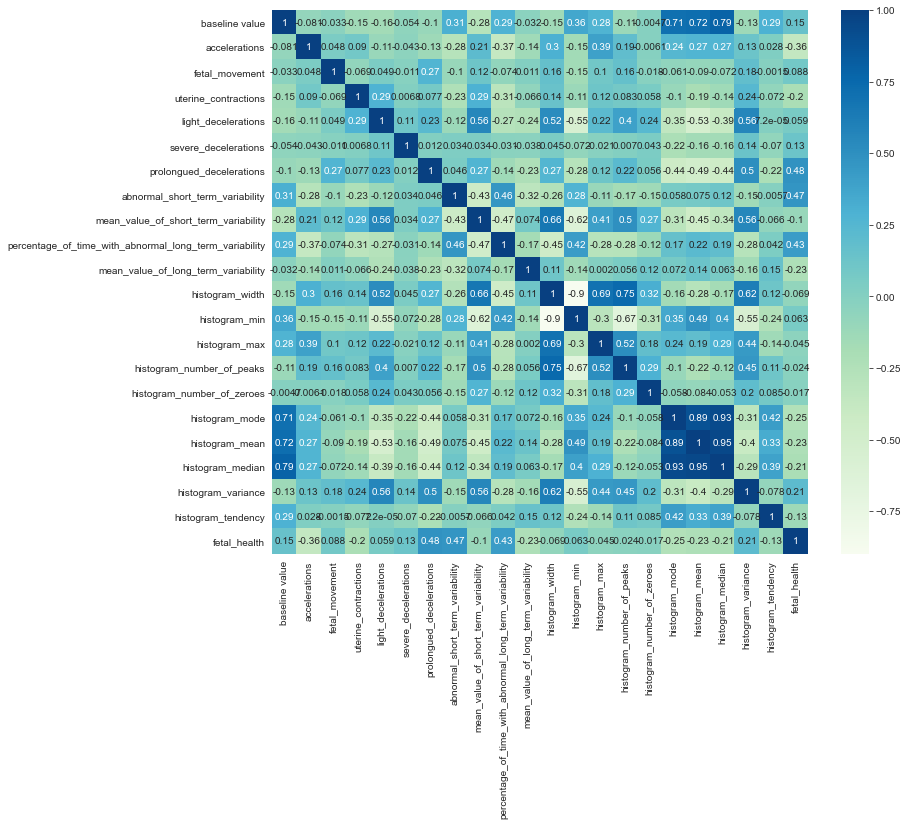

In [86]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(fetal_health_df.corr(), annot=True, cmap = "GnBu")  

Here, we can clearly see that 'histogram_mode', 'histogram_mean', 'histogram_median' are highly correlated, we might want to exclude them in future.

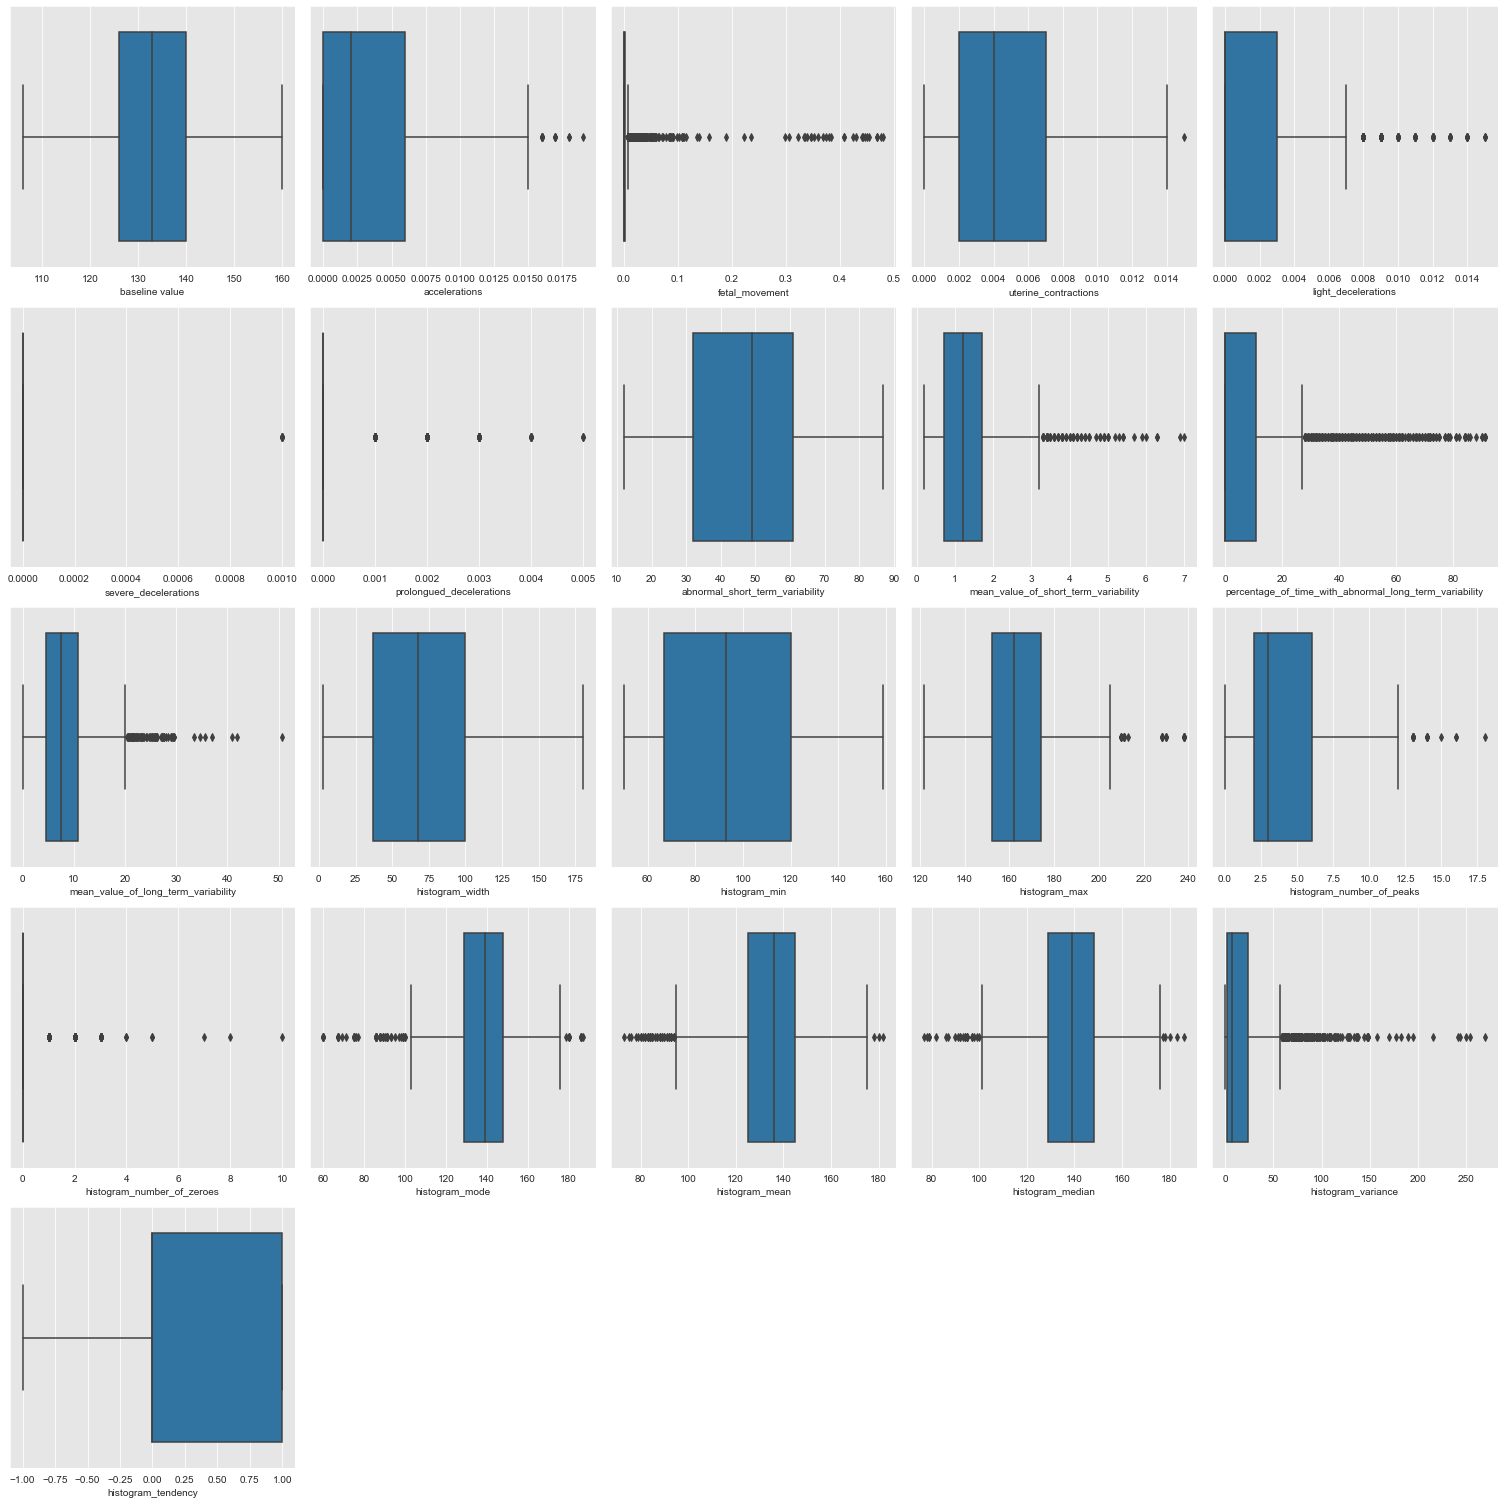

In [87]:
plt.figure(figsize=(21,21))
for i, col in enumerate(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']):
    plt.subplot(5,5,i+1)
    sns.axes_style()
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.boxplot(data=fetal_health_df,x=col)    
    plt.tight_layout()

**Insights**

- No null values, that is great.
- I do not think there are any outliers, in histogram_variance column, there are few values which looks like outliers but not very extreme values. Let us find more about it.

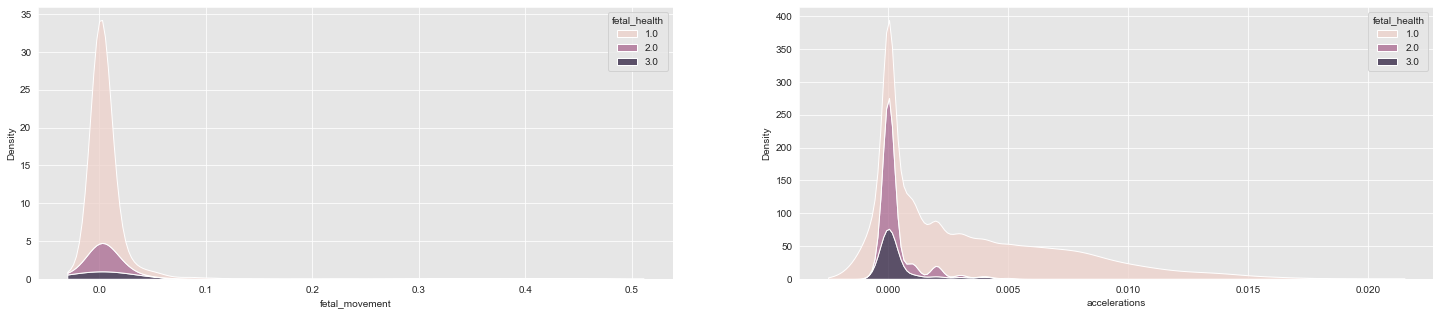

In [88]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['fetal_movement'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["accelerations"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

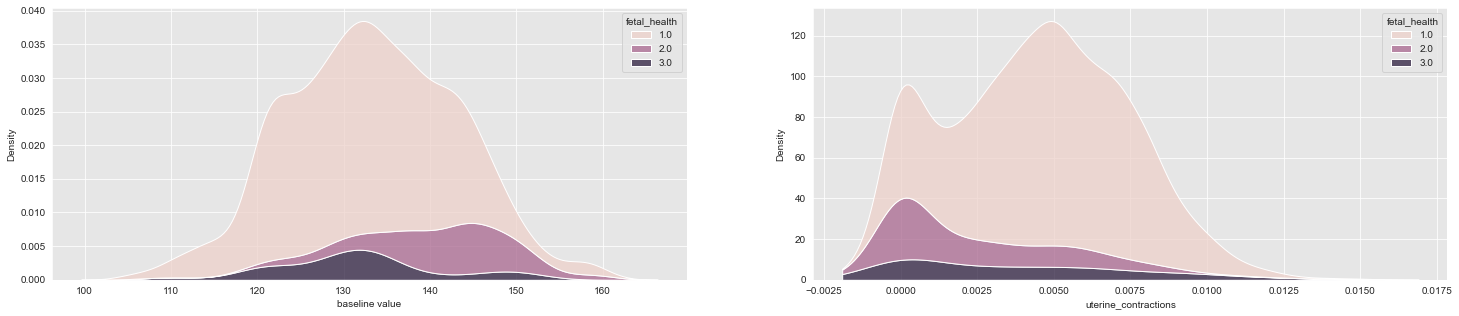

In [89]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['baseline value'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["uterine_contractions"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

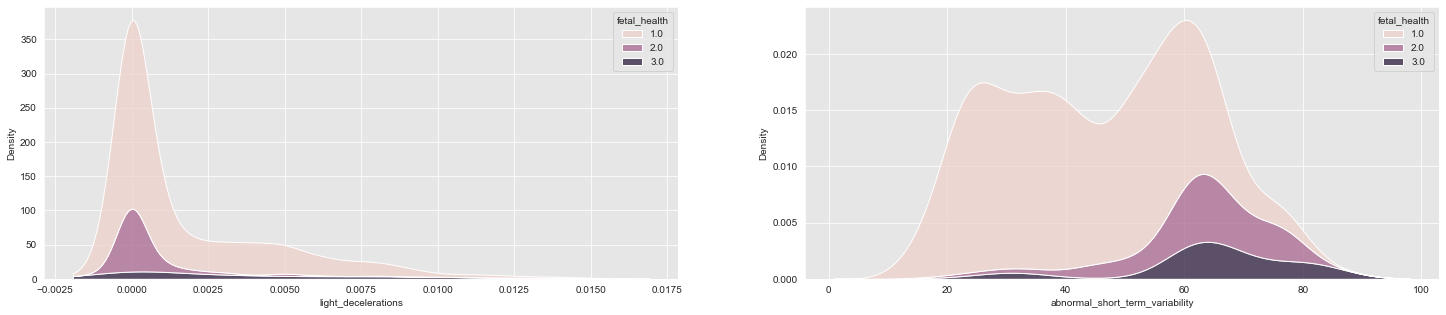

In [90]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['light_decelerations'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["abnormal_short_term_variability"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

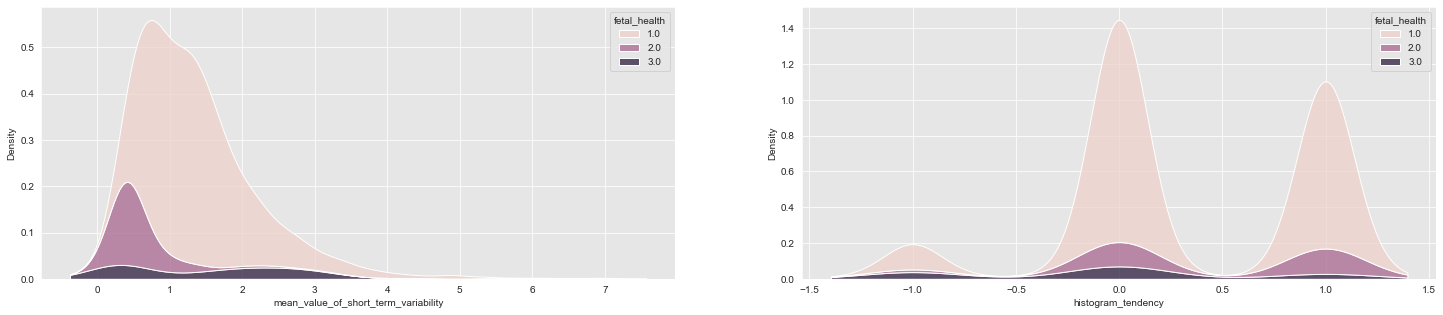

In [91]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.kdeplot(fetal_health_df['mean_value_of_short_term_variability'],ax=ax[0],hue=fetal_health_df['fetal_health'],multiple="stack");
sns.kdeplot(fetal_health_df["histogram_tendency"],ax=ax[1],hue=fetal_health_df['fetal_health'],multiple="stack");

**Insights**

- Features uterine_contractions, abnormal_short_term_variability and mean_value_of_short_term_variability can be useful classification because I think these can distinguish the class.
- For these features, we see that region of fetal health can be clustered, not completely but to an extent.

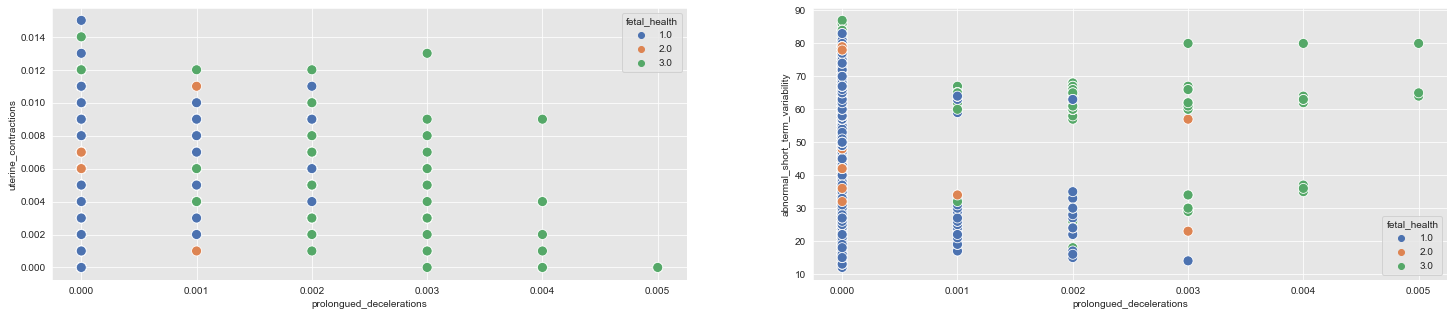

In [92]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='uterine_contractions',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='abnormal_short_term_variability',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

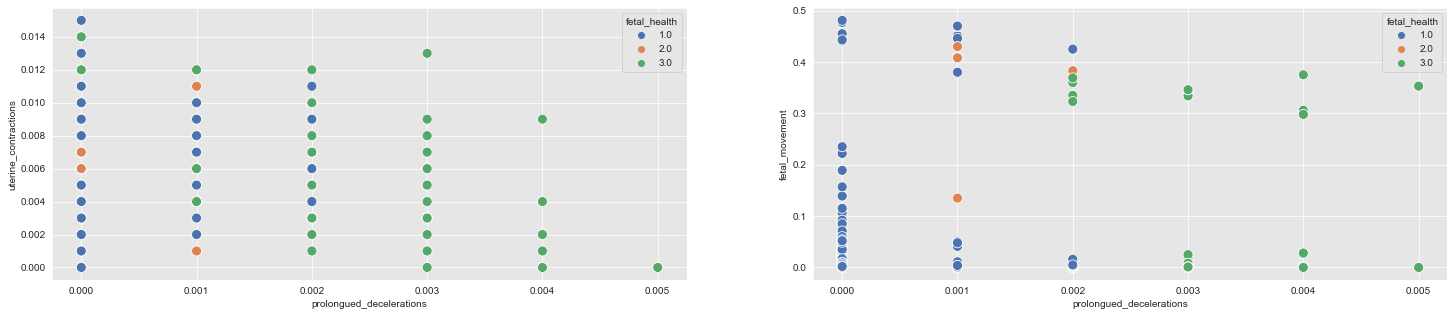

In [93]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='uterine_contractions',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='fetal_movement',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

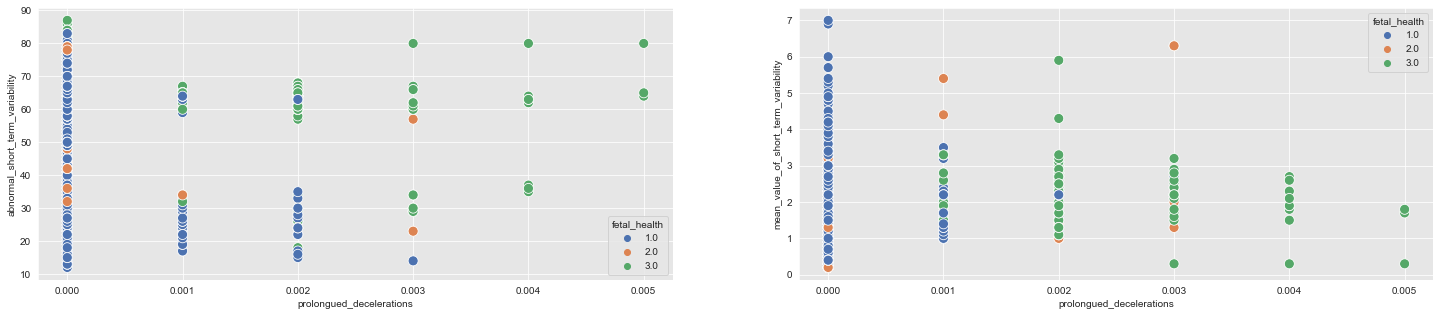

In [94]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='abnormal_short_term_variability',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='prolongued_decelerations',y='mean_value_of_short_term_variability',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

**Insights**

- From the above feature graphs, we see that fetal Pathological can be distinguished, with some error of course, but class Suspect is not easily separated.

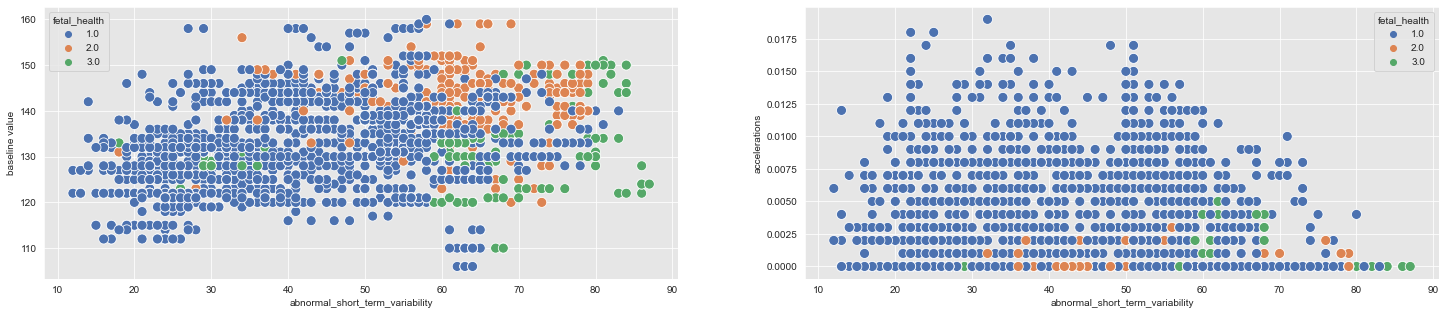

In [95]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='baseline value',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='accelerations',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

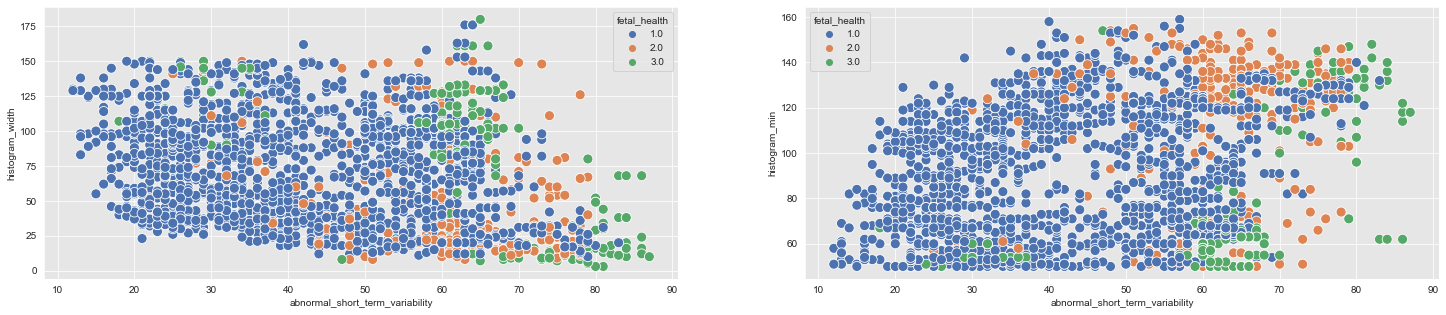

In [96]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_width',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_min',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

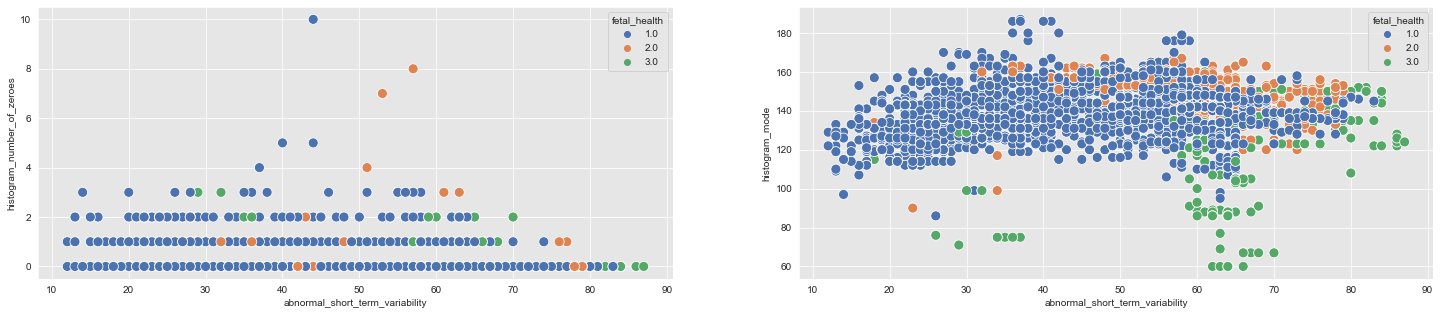

In [97]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_number_of_zeroes',hue='fetal_health',palette="deep",s=100,ax=ax[0]);
sns.scatterplot(data=fetal_health_df,x='abnormal_short_term_variability',y='histogram_mode',hue='fetal_health',palette="deep",s=100,ax=ax[1]);

**Insights**

- In the plot, abnormal_short_term_variability vs baseline value there is a small cluster formed after abnormal_short_term_variability value 50 and baseline value greater than 130. Evidently, Suspect cluster is formed.
- Similarly, with the features, abnormal_short_term_variability vs histogram_min, similar cluster is formed.
- Features, abnormal_short_term_variability, histogram_min, histogram_mode, prolongued_decelerations and uterine_contractions can be useful for classification.

**Let us investigate distribution of these features:**

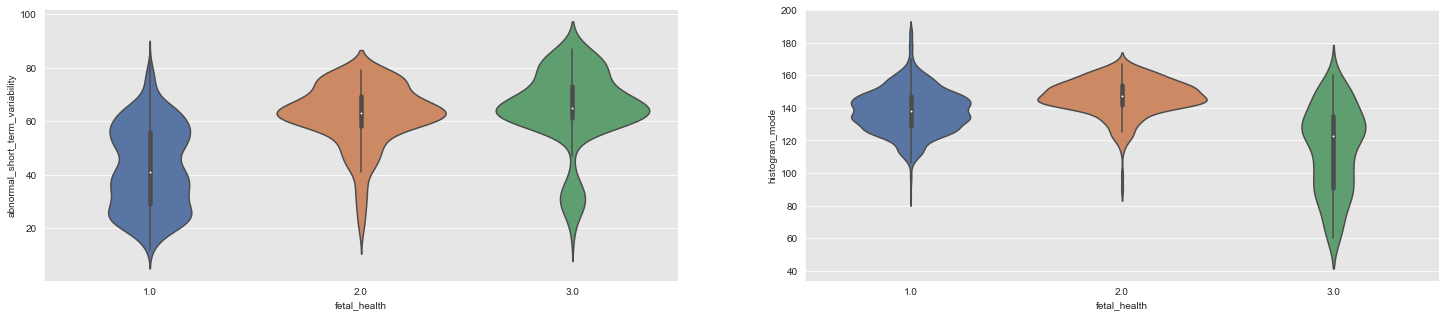

In [98]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.violinplot(data=fetal_health_df,y='abnormal_short_term_variability',x='fetal_health',palette="deep",ax=ax[0]);
sns.violinplot(data=fetal_health_df,y='histogram_mode',x='fetal_health',palette="deep",ax=ax[1]);

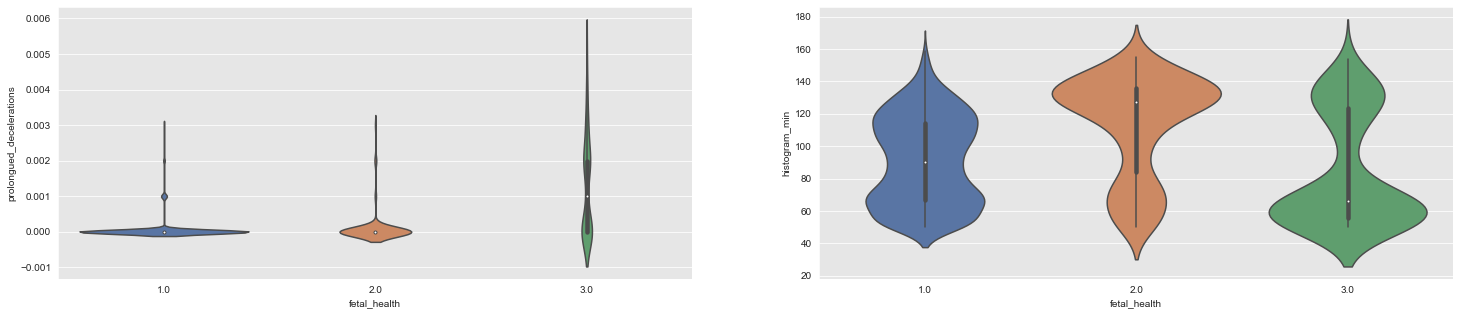

In [99]:
fig, ax =plt.subplots(1,2,figsize=(25,5))
sns.violinplot(data=fetal_health_df,y='prolongued_decelerations',x='fetal_health',palette="deep",ax=ax[0]);
sns.violinplot(data=fetal_health_df,y='histogram_min',x='fetal_health',palette="deep",ax=ax[1]);

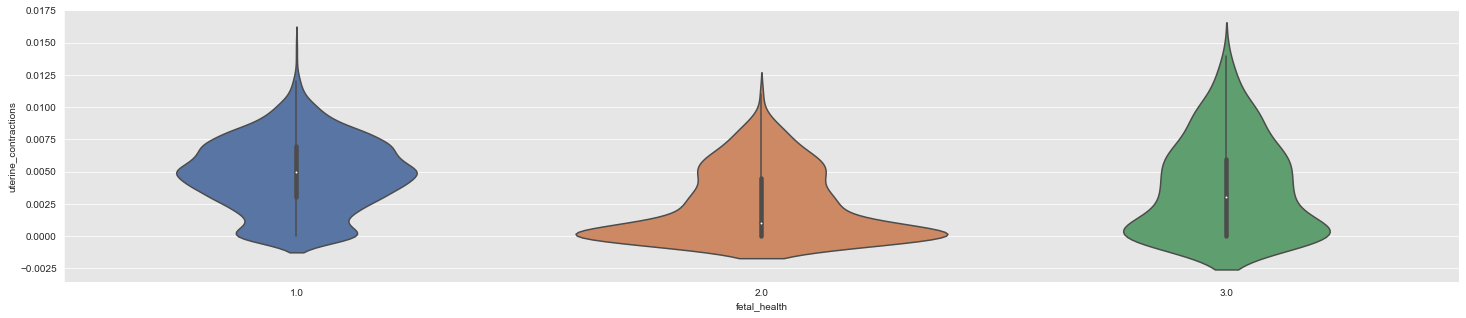

In [100]:
fig, ax =plt.subplots(figsize=(25,5))
sns.violinplot(data=fetal_health_df,y='uterine_contractions',x='fetal_health',palette="deep");

**Insights**

- In feature, abnormal_short_term_variability majority of the Suspected and Pathological points are around 60 and greater than 60.
- In feature, histogram_mode it is little difficult separate Normal and Suspected as they are in almost same distribution.
- In feature, prolongued_decelerations, Normal and Suspected values are around 0, but Pathological are distributed.
- Again, I do not see any specific pattern in histogram_min.
- In feature, uterine_contractions, Most of the points in Suspected and Pathological lies around 0, most important is that there is little proper separation for Suspected class.


**Let us separate our dependent and independent variables**

In [101]:
X = fetal_health_df[['baseline value','accelerations','uterine_contractions','prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability']]
y = fetal_health_df['fetal_health']

## Splitting the data into training and testing datasets

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

Now again splitting the training dataset into two parts namely training and validation dataset.The reason why I have done this is because our fetal_health dataset is imbalanced and we have to balance the dataset.

The model performance on the imbalanced testing dataset will be bad if the training dataset is balanced and validation set is also balanced, but the model performance will be better if the training dataset is balanced and validation set is imbalanced. Since the model performance would be same with the validation set and testing set, we can evaluate the accuracy of our model precisely when dealing with hyperparameter tuning.

In [103]:
from sklearn.model_selection import train_test_split
X_X_train,X_val,y_y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=101)

## Standardization

In [104]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_X_train=ss.fit_transform(X_X_train)
X_val=ss.transform(X_val)
X_test=ss.transform(X_test)

## Balancing the dataset using RandomOverSampler

In [105]:
! pip install imblearn

In [106]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X_X_train, y_y_train)

In [107]:
from collections import Counter
print('Original dataset shape: {}'.format(Counter(y_y_train)))
print('Resampled dataset shape: {}'.format(Counter(y_train_res)))

Original dataset shape: Counter({1.0: 1065, 2.0: 180, 3.0: 115})
Resampled dataset shape: Counter({1.0: 1065, 3.0: 1065, 2.0: 1065})


In [108]:
from collections import Counter
print('Original dataset shape: {}'.format(Counter(y_test)))
#print('Resampled dataset shape: {}'.format(Counter(y_train_res)))

Original dataset shape: Counter({1.0: 330, 2.0: 60, 3.0: 36})


## Model Building

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Hyperparameter Tuning

In [110]:
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy'],
            'splitter':['best', 'random'],'max_features':['auto', 'sqrt', 'log2']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
            ,'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[10,20,30,40,50]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
    
}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_X_train,y_y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [113]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
pd.set_option('display.max_colwidth', -1)
df_model_score

<ipython-input-113-9fae4899d532>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


model  best_score  \
0  DecisionTreeClassifier  0.886765     
1  KNeighborsClassifier    0.894118     
2  SVC                     0.897794     

                                                                        best_params  
0  {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}                 
1  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}  
2  {'C': 10, 'kernel': 'rbf'}

In [114]:
knn_model = KNeighborsClassifier(leaf_size=10,n_neighbors=10,weights='distance')
knn_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [115]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn_model, X=X_val ,y=y_val,cv=10)
print("KNN's accuracy is {:.2f} %".format(accuracies.mean()*100))
print("KNN's std is {:.2f} %".format(accuracies.std()*100))

KNN's accuracy is 88.24 %
KNN's std is 4.16 %


In [116]:
decision_model = DecisionTreeClassifier(criterion='entropy',max_features='log2')
decision_model.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_features='log2')

In [117]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=decision_model, X=X_val ,y=y_val,cv=10)
print("Decision Tree Classifier's accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Decision Tree Classifier's std is {:.2f} %".format(accuracies.std()*100))

Decision Tree Classifier's accuracy is 83.82 %
Decision Tree Classifier's std is 4.21 %


In [118]:
svc_modell = SVC(C=10,kernel='rbf')
svc_modell.fit(X_train_res,y_train_res)

SVC(C=10)

In [119]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svc_modell, X=X_val ,y=y_val,cv=10)
print("SVC's accuracy is {:.2f} %".format(accuracies.mean()*100))
print("SVC's std is {:.2f} %".format(accuracies.std()*100))

SVC's accuracy is 87.65 %
SVC's std is 4.32 %


In [120]:
random_model = RandomForestClassifier()
random_model.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [121]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=random_model, X=X_val,y=y_val,cv=10)
print("Random Forest Classifier's accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Random Forest Classifier's std is {:.2f} %".format(accuracies.std()*100))

Random Forest Classifier's accuracy is 88.53 %
Random Forest Classifier's std is 4.04 %


## Model Prediction

In [122]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [123]:
knn_pre = knn_model.predict(X_test)
acc_knn = accuracy_score(knn_pre,y_test)

In [124]:
svm_pre = svc_modell.predict(X_test)
acc_svm = accuracy_score(svm_pre,y_test)

In [125]:
decision_pre = decision_model.predict(X_test)
acc_decision  = accuracy_score(decision_pre,y_test)

In [126]:
random_pre = random_model.predict(X_test)
acc_random = accuracy_score(random_pre,y_test)

## Accuracies of all Models

In [127]:
print('KNN\'s accuracy is {:.4f} %'.format(acc_knn*100))
print('SVC\'s accuracy is {:.4f} %'.format(acc_svm*100))
print('Decision Tree Classifier\'s accuracy is {:.4f} %'.format(acc_decision*100))
print('Random Forest Classifier\'s accuracy is {:.4f} %'.format(acc_random*100))

KNN's accuracy is 88.2629 %
SVC's accuracy is 87.0892 %
Decision Tree Classifier's accuracy is 89.4366 %
Random Forest Classifier's accuracy is 91.5493 %


**It looks like random forest classifier is the best performing model with close to 92% accuracy. So, I will be using Random Forest Classifier in my final model for predicting fetal health.**

## Pickling

In [128]:
import pickle

filename = 'fetal_health_classification'
pickle.dump(random_model, open(filename, 'wb'))